In [1]:
#imports
import csv
import re
import os
import pandas as pd
import numpy as np
import nltk

#for tweet tokenization
from nltk import TweetTokenizer
tt = TweetTokenizer()

from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer
pstem = PorterStemmer()
lem = WordNetLemmatizer()


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

from pprint import pprint
from datetime import datetime

#plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


#word count
from collections import Counter


#sentiment analysis
from textblob import TextBlob

# spacy for lemmatization
import spacy;
import en_core_web_sm

# Topic modeling
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#escaping html characters
from html.parser import HTMLParser
html_parser = HTMLParser()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [2]:
rb = pd.read_csv('../CSV/ms_tweets_final.csv')
rb.head()

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,KunklerKkunkler,Kathleen Kunkler,1334122008,1256009481042817024,/KunklerKkunkler/status/1256009481042817024,2020-04-30 23:56:10,1588290970,Highlight of the @MorganStanley Multicultural ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,2,0,0,False,False,NaN,[]
1,1,donaldplawson,DonaldPatrickLawson,2800358706,1256000296041447425,/donaldplawson/status/1256000296041447425,2020-04-30 23:19:40,1588288780,Some might even say a hurricane is forming — a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW40UI6WoAA92oC....,NaN,0,0,0,False,True,1.255984e+18,"[{'screen_name': 'GemmaActon', 'user_id': '303..."
2,2,Chrisgebb,Christopher Gebbie,837779402,1255987714664607745,/Chrisgebb/status/1255987714664607745,2020-04-30 22:29:40,1588285780,@MorganStanley\n@POTUS\nThat's a liehttps://ww...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
3,3,JohnAByrne,JOHNABYRNE,16574209,1255983976218423297,/JohnAByrne/status/1255983976218423297,2020-04-30 22:14:49,1588284889,Joshua Lah left @jpmorgan in London to get his...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW4mxCXU4AEP8JE....,NaN,2,0,0,False,False,NaN,[]
4,4,PoetsAndQuants,Poets&Quants,128938832,1255983860744990720,/PoetsAndQuants/status/1255983860744990720,2020-04-30 22:14:22,1588284862,Joshua Lah left @jpmorgan in London to get his...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW4mqR5U0AApfm_....,NaN,2,0,0,False,False,NaN,[]


In [3]:
#dropping duplicates
rb = rb.drop_duplicates(subset = 'text', keep = 'first').reset_index(drop = True)
rb.head()

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,KunklerKkunkler,Kathleen Kunkler,1334122008,1256009481042817024,/KunklerKkunkler/status/1256009481042817024,2020-04-30 23:56:10,1588290970,Highlight of the @MorganStanley Multicultural ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,2,0,0,False,False,NaN,[]
1,1,donaldplawson,DonaldPatrickLawson,2800358706,1256000296041447425,/donaldplawson/status/1256000296041447425,2020-04-30 23:19:40,1588288780,Some might even say a hurricane is forming — a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW40UI6WoAA92oC....,NaN,0,0,0,False,True,1.255984e+18,"[{'screen_name': 'GemmaActon', 'user_id': '303..."
2,2,Chrisgebb,Christopher Gebbie,837779402,1255987714664607745,/Chrisgebb/status/1255987714664607745,2020-04-30 22:29:40,1588285780,@MorganStanley\n@POTUS\nThat's a liehttps://ww...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
3,3,JohnAByrne,JOHNABYRNE,16574209,1255983976218423297,/JohnAByrne/status/1255983976218423297,2020-04-30 22:14:49,1588284889,Joshua Lah left @jpmorgan in London to get his...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW4mxCXU4AEP8JE....,NaN,2,0,0,False,False,NaN,[]
4,4,PoetsAndQuants,Poets&Quants,128938832,1255983860744990720,/PoetsAndQuants/status/1255983860744990720,2020-04-30 22:14:22,1588284862,Joshua Lah left @jpmorgan in London to get his...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EW4mqR5U0AApfm_....,NaN,2,0,0,False,False,NaN,[]


In [4]:
rb.shape

(43945, 22)

# Data Cleaning
This does not include Stemming, Lemmatization, Tokenization or Stop Words Removal

In [5]:
#convert to lower case
rb['text'] = rb['text'].str.lower()
rb.head()['text']

0    highlight of the @morganstanley multicultural ...
1    some might even say a hurricane is forming — a...
2    @morganstanley\n@potus\nthat's a liehttps://ww...
3    joshua lah left @jpmorgan in london to get his...
4    joshua lah left @jpmorgan in london to get his...
Name: text, dtype: object

In [6]:
#Allocating a separate Dataframe for the tweet text
tweets = rb[["text"]]
tweets['original_tweet']= tweets['text']
tweets.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(43945, 2)

In [7]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    #Text = Text.str.decode('utf-8')
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\u2066)', ' ')
    Text = Text.str.replace('(\u2069)', ' ')
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    
    #removing twitter images URL
    Text = Text.str.replace('pic.twitter.com', '')
    return Text

#apply all the preprocess functions
tweets['text'] = preprocess(tweets.text)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
#Removing urls
tweets = tweets.replace('https?:\/\/.*[\r\n]*', '', regex = True)


#removing hashtags(including the word after #), numbers and twitter handles
#removing random symbols after /
tweets = tweets.replace("[0-9]+", '', regex = True)
tweets = tweets.replace("#[a-zA-Z0-9]+", '', regex = True)
tweets = tweets.replace("@[a-zA-Z0-9]+", '', regex = True)
tweets = tweets.replace("/[a-zA-Z0-9]+", '', regex = True)
tweets['text'][0]

'highlight of the  multicultural leadership symposium last year was hearing your story   '

In [9]:
tweets = tweets.replace("[,@!&\;|'-?\.$%_]",'', regex = True)
tweets['text'][0]

'highlight of the  multicultural leadership symposium last year was hearing your story   '

In [14]:
tweets = tweets.replace("[\\u2018\\u2019]", "'", regex = True)

In [15]:
tweets.text=tweets.text.astype(str)
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
tweets.text = tweets.text.apply(lambda x: rm_punc.sub(' ', x))
tweets.text = tweets.text.apply(lambda x: rm_space.sub(' ', x))
tweets['text'][0]

'highlight of the multicultural leadership symposium last year was hearing your story '

In [16]:
#Escaping HTML Characters
tweets.text.apply(lambda x: html_parser.unescape(x))

#Setting to ASCII encoding
tweets.text.apply(lambda x: x.encode('ascii','ignore'))
tweets.text=tweets.text.astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  


In [17]:
tweets['text'][10]

'horay for friends'

In [18]:
#dealing with contracted words
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
  def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
    expanded_contraction = first_char+expanded_contraction[1:]
    return expanded_contraction
        
  expanded_text = contractions_pattern.sub(expand_match, text)
  expanded_text = re.sub("'", "", expanded_text)
  return expanded_text


In [19]:
def normalize_corpus(corpus):
  normalized_corpus = []
  
  for doc in corpus:
    doc = expand_contractions(doc)
    normalized_corpus.append(doc)

  return normalized_corpus

tweets['cleaned'] = pd.Series(normalize_corpus(tweets['text']))

In [21]:
#Extracting date and time
#extracting date and time
tweets['timestamp']= rb['timestamp']
tweets['date'] = pd.to_datetime(tweets['timestamp'], errors='coerce').dt.strftime('%Y-%m-%d')
tweets['time'] = pd.to_datetime(tweets['timestamp'], errors='coerce').dt.strftime("%H-%M-%S")

tweets.head()

,text,original_tweet,timestamp,date,time,cleaned
0,highlight of the multicultural leadership symp...,highlight of the multicultural leadership sym...,2020-04-30 23:56:10,2020-04-30,23-56-10,highlight of the multicultural leadership symp...
1,some might even say a hurricane is forming and...,some might even say a hurricane is forming — a...,2020-04-30 23:19:40,2020-04-30,23-19-40,some might even say a hurricane is forming and...
2,thats a lie,\n\nthats a lie,2020-04-30 22:29:40,2020-04-30,22-29-40,thats a lie
3,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:49,2020-04-30,22-14-49,joshua lah left in london to get his mba at an...
4,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:22,2020-04-30,22-14-22,joshua lah left in london to get his mba at an...


In [22]:
tweets_copy1 = tweets.copy()

In [23]:
#remove stop words
stop_words = stopwords.words('english')
stop_words[0:5]

['i', 'me', 'my', 'myself', 'we']

In [24]:
not_stopwords = ['not']
common_words =['please',
               'the','would','could','can','may','must', 'should'
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca', 'wealth', 'management']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
tweets_copy1.cleaned = tweets_copy1.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))
    
tweets_copy1['cleaned'].head(20)

0     highlight multicultural leadership symposium l...
1     might even say hurricane forming already name ...
2                                             thats lie
3     joshua lah left london get mba gives credit me...
4     joshua lah left london get mba gives credit me...
5     want thank taking time speak team today life s...
6     well done morgan stanley ascend leader keep pu...
7     amid crisis joining coalition organizations st...
8     ummmmmm case noticed jack ass governors alread...
9     called unique crappy ways brokers like nichola...
10                                        horay friends
11    dont phd read algorithmically model lmms move ...
12    huge win became fifth major bank pledge not fu...
13    thanks smart online commentary helping inspire...
14                  renew season everything sucks thank
15                                         entertaining
16                                                  wow
17    report environmental consulting services i

In [25]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
tweets_copy1.text = tweets_copy1.text.apply(lambda x: rm_punc.sub(' ', x))
tweets_copy1.text = tweets_copy1.text.apply(lambda x: rm_space.sub(' ', x))
tweets_copy1['cleaned'].head(20)

0     highlight multicultural leadership symposium l...
1     might even say hurricane forming already name ...
2                                             thats lie
3     joshua lah left london get mba gives credit me...
4     joshua lah left london get mba gives credit me...
5     want thank taking time speak team today life s...
6     well done morgan stanley ascend leader keep pu...
7     amid crisis joining coalition organizations st...
8     ummmmmm case noticed jack ass governors alread...
9     called unique crappy ways brokers like nichola...
10                                        horay friends
11    dont phd read algorithmically model lmms move ...
12    huge win became fifth major bank pledge not fu...
13    thanks smart online commentary helping inspire...
14                  renew season everything sucks thank
15                                         entertaining
16                                                  wow
17    report environmental consulting services i

In [26]:
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
tweets_copy1.cleaned = tweets_copy1.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))
    
tweets_copy1['cleaned'].head()

0    highlight multicultural leadership symposium l...
1    might even say hurricane forming already name ...
2                                            thats lie
3    joshua lah left london get mba gives credit me...
4    joshua lah left london get mba gives credit me...
Name: cleaned, dtype: object

In [27]:
#new column with a stopwords less column
tweets['sw_clean'] = tweets_copy1['cleaned']
tweets.head()

,text,original_tweet,timestamp,date,time,cleaned,sw_clean
0,highlight of the multicultural leadership symp...,highlight of the multicultural leadership sym...,2020-04-30 23:56:10,2020-04-30,23-56-10,highlight of the multicultural leadership symp...,highlight multicultural leadership symposium l...
1,some might even say a hurricane is forming and...,some might even say a hurricane is forming — a...,2020-04-30 23:19:40,2020-04-30,23-19-40,some might even say a hurricane is forming and...,might even say hurricane forming already name ...
2,thats a lie,\n\nthats a lie,2020-04-30 22:29:40,2020-04-30,22-29-40,thats a lie,thats lie
3,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:49,2020-04-30,22-14-49,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...
4,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:22,2020-04-30,22-14-22,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...


# vader sentiment analysis

In [28]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sherinnaha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
sent = SentimentIntensityAnalyzer()
tweets['Vader Sentiment Scores'] = tweets['text'].apply(sent.polarity_scores)
tweets.head()

,text,original_tweet,timestamp,date,time,cleaned,sw_clean,Vader Sentiment Scores
0,highlight of the multicultural leadership symp...,highlight of the multicultural leadership sym...,2020-04-30 23:56:10,2020-04-30,23-56-10,highlight of the multicultural leadership symp...,highlight multicultural leadership symposium l...,"{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp..."
1,some might even say a hurricane is forming and...,some might even say a hurricane is forming — a...,2020-04-30 23:19:40,2020-04-30,23-19-40,some might even say a hurricane is forming and...,might even say hurricane forming already name ...,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp..."
2,thats a lie,\n\nthats a lie,2020-04-30 22:29:40,2020-04-30,22-29-40,thats a lie,thats lie,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:49,2020-04-30,22-14-49,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."
4,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:22,2020-04-30,22-14-22,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."


In [34]:
# get the polarity of each text
tweets['polarity'] = tweets['text'].map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
tweets['sentiment'] = ''
tweets['sentiment'][tweets['polarity'] > 0] = 'positive'
tweets['sentiment'][tweets['polarity'] == 0] = 'neutral'
tweets['sentiment'][tweets['polarity'] < 0] = 'negative'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
tweets['Negative'] = tweets['Neutral'] = tweets['Positive'] = tweets['Compound']=''
for i in range(tweets.shape[0]):
    tweets['Negative'][i] = tweets['Vader Sentiment Scores'][i]['neg']
    tweets['Neutral'][i] = tweets['Vader Sentiment Scores'][i]['neu']
    tweets['Positive'][i] = tweets['Vader Sentiment Scores'][i]['pos']
    tweets['Compound'][i] = tweets['Vader Sentiment Scores'][i]['compound']
tweets.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,text,original_tweet,timestamp,date,time,cleaned,sw_clean,Vader Sentiment Scores,polarity,sentiment,Negative,Neutral,Positive,Compound
0,highlight of the multicultural leadership symp...,highlight of the multicultural leadership sym...,2020-04-30 23:56:10,2020-04-30,23-56-10,highlight of the multicultural leadership symp...,highlight multicultural leadership symposium l...,"{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp...",0.00,neutral,0,0.821,0.179,0.34
1,some might even say a hurricane is forming and...,some might even say a hurricane is forming — a...,2020-04-30 23:19:40,2020-04-30,23-19-40,some might even say a hurricane is forming and...,might even say hurricane forming already name ...,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.25,positive,0,0.901,0.099,0.3182
2,thats a lie,\n\nthats a lie,2020-04-30 22:29:40,2020-04-30,22-29-40,thats a lie,thats lie,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,neutral,0,1,0,0
3,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:49,2020-04-30,22-14-49,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.00,neutral,0,0.866,0.134,0.7096
4,joshua lah left in london to get his mba at an...,joshua lah left in london to get his mba at ...,2020-04-30 22:14:22,2020-04-30,22-14-22,joshua lah left in london to get his mba at an...,joshua lah left london get mba gives credit me...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.00,neutral,0,0.866,0.134,0.7096


In [27]:
tweets.to_csv('rb_sentiments.csv')

In [28]:
tweets.dtypes

text                       object
original_tweet             object
cleaned                    object
timestamp                  object
date                       object
time                       object
sw_clean                   object
Vader Sentiment Scores     object
polarity                  float64
sentiment                  object
Negative                   object
Neutral                    object
Positive                   object
Compound                   object
dtype: object

In [29]:
tweets.head()

,text,original_tweet,cleaned,timestamp,date,time,sw_clean,Vader Sentiment Scores,polarity,sentiment,Negative,Neutral,Positive,Compound
0,cashwerkz asx cwz australias leading online ca...,cashwerkz asx cwz australias leading online ca...,cashwerkz asx cwz australias leading online ca...,2020-04-08 23:27:17,2020-04-08,23-27-17,cashwerkz asx cwz australias leading online ca...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,neutral,0,1,0,0
1,i just saw how the coronavirus affects stock m...,i just saw how the coronavirus affects stock m...,i just saw how the coronavirus affects stock m...,2020-04-08 22:14:33,2020-04-08,22-14-33,saw coronavirus affects stock markets robo adv...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,neutral,0,1,0,0
2,ubs has increased to the maximum fee customers...,ubs has increased to the maximum fee customer...,ubs has increased to the maximum fee customers...,2020-04-08 20:50:04,2020-04-08,20-50-04,ubs increased maximum fee customers charged di...,"{'neg': 0.091, 'neu': 0.86, 'pos': 0.049, 'com...",-0.033333,negative,0.091,0.86,0.049,-0.2023
3,ubs raises maximum fee on robo accounts servic...,ubs raises maximum fee on robo accounts servic...,ubs raises maximum fee on robo accounts servic...,2020-04-08 20:20:45,2020-04-08,20-20-45,ubs raises maximum fee robo accounts serviced ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,neutral,0,1,0,0
4,build wealth and make your life simpler by inv...,build wealth and make your life simpler by inv...,build wealth and make your life simpler by inv...,2020-04-08 19:06:06,2020-04-08,19-06-06,build make life simpler investing roboadvisor ...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.000000,neutral,0,0.882,0.118,0.4939


In [30]:
# tweets['date'] = pd.to_datetime(tweets['date'])
# start_date='2019-06-01'
# end_date='2019-06-30'
# (tweets[(tweets['date'] > start_date) & (tweets['date'] <= end_date)]).to_csv('June19_esg.csv')

# Topic Vectors  - LDA Mallet

In [33]:
mallet_path = '../mallet-2.0.8/bin/mallet' # update this path
#finding optimal number of topics based on coherence value

start=10
limit=30
step=2
random = 155

tweets_copy2 = tweets.copy()

In [34]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(tweets_copy2['cleaned']))

#remove remaining stop words
data_words = [[word for word in doc if word not in final_stop_words] for doc in data_words]


# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
  """https://spacy.io/api/annotation"""
  texts_out = []
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
  return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [36]:
#Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=random)
                                                 #,random_seed=random
      model.save('model5.lda')
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

In [ ]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
#plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## LDA Mallet - Topics and Keywords

In [38]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=20, 
                                             id2word=id2word)

# Show Topics
model_topics = ldamallet.show_topics(formatted=False)
pprint(sorted(ldamallet.print_topics(num_words=6)))

[(0,
  '0.217*"investment" + 0.129*"fee" + 0.106*"low" + 0.060*"top" + '
  '0.053*"digital" + 0.051*"performance"'),
 (1,
  '0.325*"advisor" + 0.151*"robo" + 0.040*"big" + 0.023*"thing" + '
  '0.022*"world" + 0.014*"decision"'),
 (2,
  '0.173*"invest" + 0.097*"find" + 0.047*"investing" + 0.045*"stock" + '
  '0.045*"solution" + 0.043*"robo"'),
 (3,
  '0.214*"roboadvisor" + 0.084*"die" + 0.034*"der" + 0.028*"move" + '
  '0.020*"test" + 0.019*"yield"'),
 (4,
  '0.157*"financial" + 0.093*"human" + 0.080*"advice" + 0.071*"service" + '
  '0.046*"late" + 0.042*"provide"'),
 (5,
  '0.157*"market" + 0.067*"today" + 0.047*"banking" + 0.047*"trend" + '
  '0.032*"automation" + 0.029*"global"'),
 (6,
  '0.055*"account" + 0.051*"firm" + 0.048*"bank" + 0.032*"offer" + '
  '0.027*"saving" + 0.026*"online"'),
 (7,
  '0.299*"roboadvisor" + 0.104*"money" + 0.055*"read" + 0.035*"time" + '
  '0.033*"account" + 0.033*"save"'),
 (8,
  '0.099*"review" + 0.095*"financial" + 0.085*"expert" + 0.072*"analysis" + 

In [39]:
import gensim    
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [40]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(gensim_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


# Frequency Analysis

In [36]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]



tweets['text_lemmatized_tokens'] = tweets.sw_clean.apply(lemmatize_text)

In [37]:
tweets_copy3=tweets.copy()

corpus = []
new = tweets_copy3['text_lemmatized_tokens'].values.tolist()
corpus = [word for i in new for word in i]

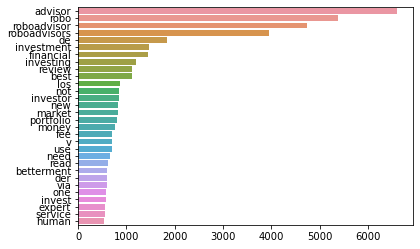

In [33]:
counter = Counter(corpus)
most = counter.most_common()

x, y= [], []
j, k= [], []

for word,count in most[:30]:
    if (word not in final_stop_words):
            x.append(word)
            y.append(count)
        
for word,count in most[:]:
    if (word not in final_stop_words):
        j.append(word)
        k.append(count)
        
sns.barplot(x = y, y = x)

In [34]:
combined_frequency = list(zip(j,k))
with open('blank.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','frequency'])
    csv_out.writerows(combined_frequency)

In [35]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:100]

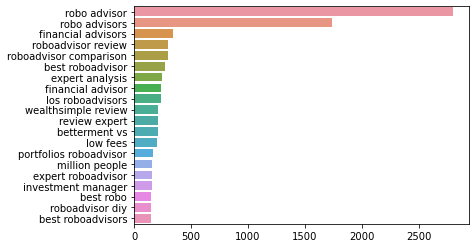

In [36]:
top_n_bigrams=get_top_ngram(tweets['sw_clean'],2)[:20]
all_n_bigrams=get_top_ngram(tweets['sw_clean'],2)
x,y=map(list,zip(*top_n_bigrams))
j,k=map(list,zip(*all_n_bigrams))
sns.barplot(x=y,y=x)

In [37]:
phrase_freq = list(zip(j,k))

with open('rb_bi-gram.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['phrase','frequency'])
    csv_out.writerows(phrase_freq)

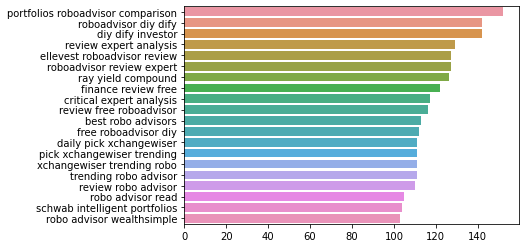

In [38]:
top_n_trigrams=get_top_ngram(tweets['sw_clean'],3)[:20]
all_n_trigrams=get_top_ngram(tweets['sw_clean'],3)
x,y=map(list,zip(*top_n_trigrams))
j,k=map(list,zip(*all_n_trigrams))
sns.barplot(x=y,y=x)

In [39]:
phrase_freq = list(zip(j,k))

with open('rb_tri-gram.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['phrase','frequency'])
    csv_out.writerows(phrase_freq)

# Key word based Analysis

In [38]:
#keywords = ['betterment','wealthsimple','schwab','wealthfront','morgan stanley','goldman sachs']
keywords=['arctic']
df1=tweets_copy3[tweets_copy3.text.apply(lambda x: any(substring in x for substring in keywords))]
df1['type']=''
df1.type=df1['type'].astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
frames=[]
for k in keywords:
    df2=df1[df1.text.str.contains(k)]
    df2['type']=k
    frames.append(df2)
df_final=pd.concat(frames)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
df1.to_csv('arctic.csv')

In [39]:
df1.shape

(217, 16)

In [44]:
avg_polarity = list()
num_texts = list()

for word in keywords:
    avg_polarity.append(tweets_copy3[tweets_copy3['text'].str.contains(word)]['polarity'].mean())
    num_texts.append(len(tweets_copy3[tweets_copy3['text'].str.contains(word)]))

In [45]:
word_analysis = pd.DataFrame()
word_analysis['keywords'] = keywords
word_analysis['avg_polarity'] = avg_polarity
word_analysis['num_texts'] = num_texts

word_analysis= word_analysis.sort_values(by = ['avg_polarity'],ascending = True)
word_analysis.reset_index(inplace = True)
word_analysis.drop('index',axis = 1,inplace = True)

In [46]:
word_analysis

,keywords,avg_polarity,num_texts
0,goldman sachs,0.082946,94
1,morgan stanley,0.209596,3
2,wealthsimple,0.212793,349
3,wealthfront,0.225383,270
4,betterment,0.248500,533
5,schwab,0.365928,213


Text(0.5, 1.0, 'The average polarity of all Tweets containing a keyword')

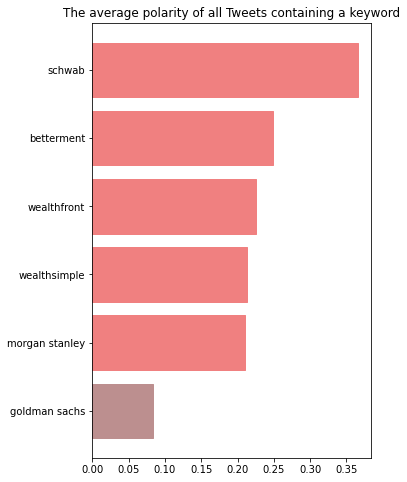

In [47]:
positive = word_analysis[word_analysis['avg_polarity']>0.2].index
mild = word_analysis[(word_analysis['avg_polarity']>=0) &(word_analysis['avg_polarity']<=0.2)].index
negative= word_analysis[word_analysis['avg_polarity']<0].index
fig, ax = plt.subplots(figsize=(5,8))
barlist =plt.barh(range(len(word_analysis['avg_polarity'])), word_analysis['avg_polarity'],color = 'grey')
ax.set_yticks(range(len(word_analysis['avg_polarity'])))
ax.set_yticklabels(word_analysis['keywords'])
plt.rc('xtick', labelsize=10) 
for word in positive:
    barlist[word].set_color('lightcoral')
for word in mild:
    barlist[word].set_color('rosybrown')
for word in negative:
    barlist[word].set_color('grey')
plt.title('The average polarity of all Tweets containing a keyword')

## Negative sentiments Analysis

In [48]:
avg_polarity = list()
num_texts = list()

for word in keywords:
    avg_polarity.append(tweets_copy3[tweets_copy3['text'].str.contains(word)]['Negative'].mean())
    num_texts.append(len(tweets_copy3[tweets_copy3['text'].str.contains(word)]))

In [49]:
word_analysis = pd.DataFrame()
word_analysis['keywords'] = keywords
word_analysis['avg_polarity'] = avg_polarity
word_analysis['num_texts'] = num_texts

word_analysis= word_analysis.sort_values(by = ['avg_polarity'],ascending = True)
word_analysis.reset_index(inplace = True)
word_analysis.drop('index',axis = 1,inplace = True)

In [50]:
word_analysis

,keywords,avg_polarity,num_texts
0,morgan stanley,0.000000,3
1,goldman sachs,0.006734,94
2,wealthfront,0.025085,270
3,betterment,0.054865,533
4,wealthsimple,0.068444,349
5,schwab,0.076465,213


Text(0.5, 1.0, 'The average polarity of all Tweets containing a keyword')

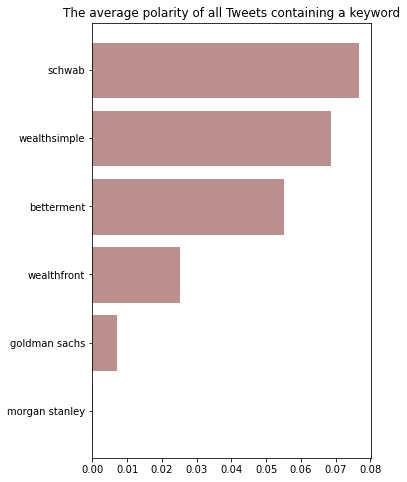

In [51]:
high = word_analysis[word_analysis['avg_polarity']>0.2].index
mild = word_analysis[(word_analysis['avg_polarity']>=0) &(word_analysis['avg_polarity']<=0.2)].index
low= word_analysis[word_analysis['avg_polarity']<0].index
fig, ax = plt.subplots(figsize=(5,8))
barlist =plt.barh(range(len(word_analysis['avg_polarity'])), word_analysis['avg_polarity'],color = 'grey')
ax.set_yticks(range(len(word_analysis['avg_polarity'])))
ax.set_yticklabels(word_analysis['keywords'])
plt.rc('xtick', labelsize=10) 
for word in high:
    barlist[word].set_color('lightcoral')
for word in mild:
    barlist[word].set_color('rosybrown')
for word in low:
    barlist[word].set_color('grey')
plt.title('The average polarity of all Tweets containing a keyword')

# covid

In [71]:
keywords = ['covid','coronavirus','corona','virus','cvd']
df2=tweets_copy3[tweets_copy3.text.apply(lambda x: any(substring in x for substring in keywords))]

In [72]:
df2.shape

(134, 15)

In [73]:
df2.to_csv('covid_rb.csv')

In [74]:
df3=tweets_copy3[tweets_copy3.text.str.contains('betterment vs')]

In [75]:
df3.to_csv('betterment vs.csv')

In [76]:
keywords = ['schwab','ameritrade','wealthfront']

frames=[]
for k in keywords:
    df4=df3[df3.text.str.contains(k)]
    df3['type']=k
    frames.append(df4)
df_final=pd.concat(frames)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_final.type.value_counts()

schwab        54
ameritrade    42
Name: type, dtype: int64

In [83]:
134-54-42

38